## Kütüphaneler

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr  1 21:20:19 2023

@author: benbe
"""

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Öğrenme veri seti,x araç km'lerini y araçların fiyatını temsil etsin
x= np.array ([[6000],[8200],[9000],[14200],[16200]]).reshape(-1,1)
y=[86000,82000,78000,75000,70000]

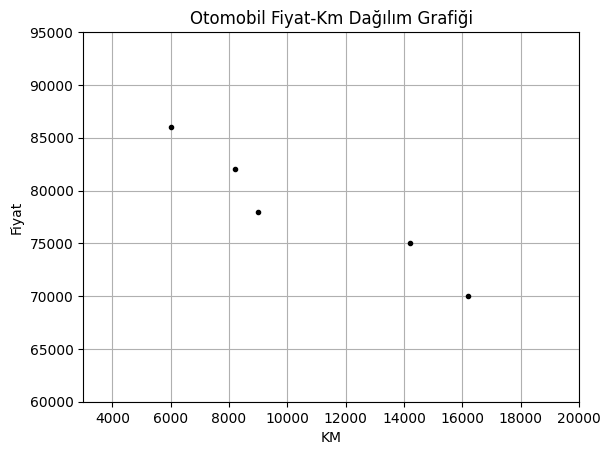

In [3]:
#Veri setini görselleştirelim.
plt.figure()
plt.title('Otomobil Fiyat-Km Dağılım Grafiği')
plt.xlabel('KM')
plt.ylabel('Fiyat')
plt.plot(x,y,'k. ')
plt.axis([3000,20000,60000,95000])
plt.grid(True)
plt.show()

In [4]:
#Basit doğrusal regresyon modelini tahmin etmek için sklearn kütüphanesinden
#LinearRegression modülünü indirdikten sonra algoritmanın verileri öğrenip
#model oluşturmasını (Parametre Katsayıları) sağlayalım.

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

#Algoritmanın model parametrelerine bakalım.

model.intercept_

model.coef_

array([-1.38509115])

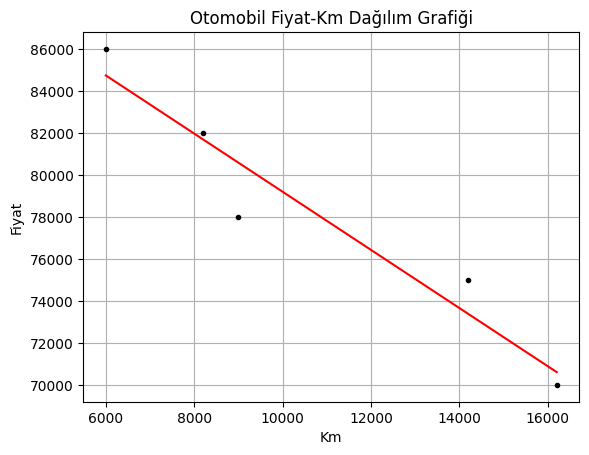

In [5]:
#Modelin tahmin doğrusunu oluşturalım.
plt.figure()
plt.title('Otomobil Fiyat-Km Dağılım Grafiği')
plt.xlabel('Km')
plt.ylabel('Fiyat')
plt.plot(x, model.predict(x), color='red')
plt.plot(x,y,'k. ')
plt.grid(True)
plt.show()

In [6]:
#12.000 Km'lik bir aracın fiyatını tahmin edelim.
test_araba=np.array([[12000]])
predict_price=model.predict(test_araba)[0]
print("12000 Km'deki aracın tahmini fiyatı: ₺%.2f" % predict_price)

#Not: Noktadan sonraki sadece 2 basamaklı küsuratı almak için %.2f ifadesini kullanıyoruz.

12000 Km'deki aracın tahmini fiyatı: ₺76427.08


In [7]:
#9000 Km'lik bir aracın fiyat tahminini yapalım.
test_araba=np.array([[9000]])
predict_price=model.predict(test_araba)[0]
print("9000 Km'deki aracın tahmini fiyatı: ₺%.2f" % predict_price)

9000 Km'deki aracın tahmini fiyatı: ₺80582.36


In [8]:
#"y_predictions" isimli bir değişken olusturup araçların km'lerinden hareketle
#modelin parametreleriyle tahmin edilen satış fiyatlarını karşılaştıralım.
y_predictions = model.predict(x)
for i, prediction in enumerate(y_predictions):
    print('Tahmin edilen fiyat: ₺%2f, Gerçek fiyat:₺ %s' % (prediction,y[i]))

Tahmin edilen fiyat: ₺84737.630208, Gerçek fiyat:₺ 86000
Tahmin edilen fiyat: ₺81690.429688, Gerçek fiyat:₺ 82000
Tahmin edilen fiyat: ₺80582.356771, Gerçek fiyat:₺ 78000
Tahmin edilen fiyat: ₺73379.882812, Gerçek fiyat:₺ 75000
Tahmin edilen fiyat: ₺70609.700521, Gerçek fiyat:₺ 70000


In [9]:
#Regresyon değerlendirme ölçütlerini hesaplıyoruz. Bunun için sklearn
#kütüphanesinden MAE,MSE ve R2 hesap modüllerini indiriyoruz.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mean_absolute_error(y,y_predictions)

mean_squared_error(y,y_predictions)

r2_score(y,y_predictions)

0.9256904961551048

In [10]:
#Sklearn'de RMSE modülü henüz hazır olmadığından bunu kendimiz hesaplıyoruz.
#RMSE, MSE'nin karekökü. Maht kütüphanesini indirerek karekök hesaplama modülünü kullanabiliriz.

from math import sqrt
RMSE= sqrt(mean_squared_error(y, y_predictions))
RMSE

1506.9500447924597

In [11]:
#Modelin test veri seti için ne kadar başarılı olduğunu test edelim. Bunun
#için test veri setini oluşturalım. x_test 5 tane yeni aracın km değerleri,
#y_test ise bu yeni araçların satış fiyatı olsun.

x_test=np.array([[1700],[2600],[11000],[14000],[17500]]).reshape(-1,1)
y_test=[94000,94400,73000,83000,75000]

C:\Users\justi\AppData\Local\Temp\ipykernel_14460\1157758630.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k. " (-> color='k'). The keyword argument will take precedence.
  plt.plot(x,y, 'k. ',color='red')


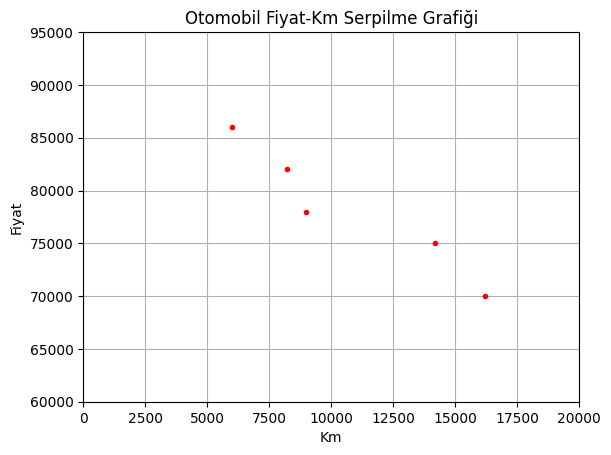

In [12]:
#Graph-1: Eğitim Veri Setinin Grafiği

plt.figure()
plt.title('Otomobil Fiyat-Km Serpilme Grafiği')
plt.xlabel('Km')
plt.ylabel('Fiyat')
plt.plot(x,y, 'k. ',color='red')
plt.axis([0,20000,60000,95000])
plt.grid(True)
plt.show()


C:\Users\justi\AppData\Local\Temp\ipykernel_14460\1100037292.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k. " (-> color='k'). The keyword argument will take precedence.
  plt.plot(x,y,'k. ', color='black')


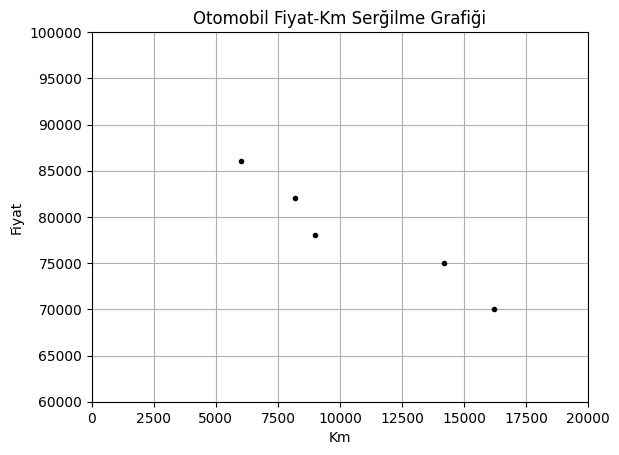

In [13]:
#Graph-2: Eğitim Veri Seti ve Tahmin Doğrusu

plt.figure()
plt.title('Otomobil Fiyat-Km Serğilme Grafiği')
plt.xlabel('Km')
plt.ylabel('Fiyat')
plt.plot(x,y,'k. ', color='black')
plt.axis([0,20000,60000,100000])
plt.grid(True)
plt.show()

C:\Users\justi\AppData\Local\Temp\ipykernel_14460\2470671267.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k. " (-> color='k'). The keyword argument will take precedence.
  plt.plot(x,y,'k. ',color='black')


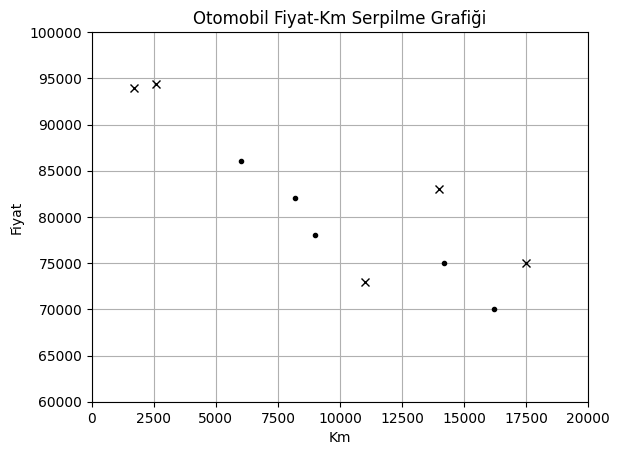

In [14]:
#Graph-3: Eğitim ve Test Veri Seti(Birlikte)

plt.figure()
plt.title('Otomobil Fiyat-Km Serpilme Grafiği')
plt.xlabel('Km')
plt.ylabel('Fiyat')
plt.plot(x,y,'k. ',color='black')
plt.plot(x_test,y_test,'x',color='black')
plt.axis([0,20000,60000,100000])
plt.grid(True)
plt.show()

C:\Users\justi\AppData\Local\Temp\ipykernel_14460\2110885396.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k. " (-> color='k'). The keyword argument will take precedence.
  plt.plot(x,y,'k. ',color='black')


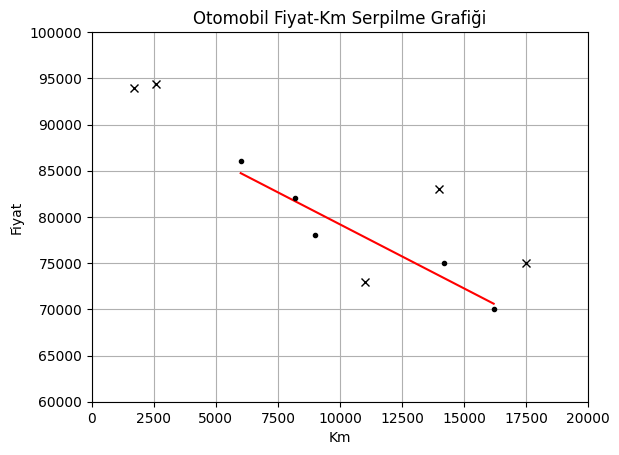

In [15]:
#Graph-4: Eğitim ve Test Veri Seti ile Eğitim Veri Setinin Tahmin Doğrusu

plt.figure()
plt.title('Otomobil Fiyat-Km Serpilme Grafiği')
plt.xlabel('Km')
plt.ylabel('Fiyat')
plt.plot(x,model.predict(x), color='red')
plt.plot(x,y,'k. ',color='black')
plt.plot(x_test,y_test,'x',color='black')
plt.axis([0,20000,60000,100000])
plt.grid(True)
plt.show()

C:\Users\justi\AppData\Local\Temp\ipykernel_14460\4265623610.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k. " (-> color='k'). The keyword argument will take precedence.
  plt.plot(x,y,'k. ',color='black')


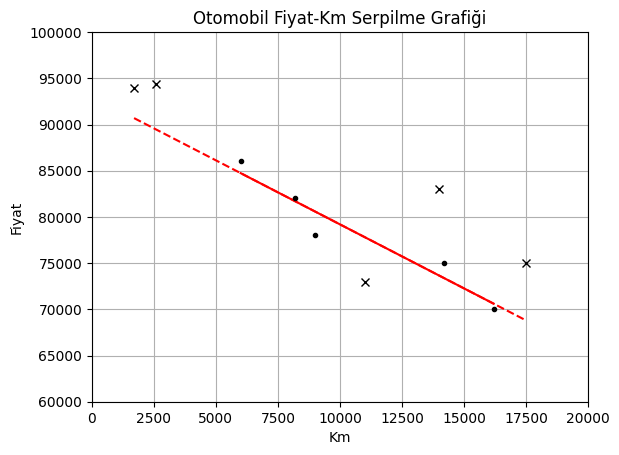

In [16]:
#Graph-5: Tahmin Doğrısı Test Veri Setini Başarılı Öngörebiliyor mu?

plt.figure()
plt.title('Otomobil Fiyat-Km Serpilme Grafiği')
plt.xlabel('Km')
plt.ylabel('Fiyat')
plt.plot(x,model.predict(x),color='red')
plt.plot(x_test,model.predict(x_test),'--',color='red')
plt.plot(x,y,'k. ',color='black')
plt.plot(x_test,y_test,'x',color='black')
plt.axis([0,20000,60000,100000])
plt.grid(True)
plt.show()

In [17]:
#Eğitim veri seti üzerinde oluşturulan tahmin modelini ile test veri setine
#uygulayalım. Bu model test veri setindeki araç km'lerinden yola çıkarak test veri
#setindeki araç fiyatlarını aynı başarıyla öngörebilecek mi?

y_test_predictions = model.predict(x_test)
for i, prediction in enumerate(y_test_predictions):
    print('Tahmin edilen fiyat: ₺%2f, Gerçek fiyat:₺ %s' % (prediction,y[i]))

Tahmin edilen fiyat: ₺90693.522135, Gerçek fiyat:₺ 86000
Tahmin edilen fiyat: ₺89446.940104, Gerçek fiyat:₺ 82000
Tahmin edilen fiyat: ₺77812.174479, Gerçek fiyat:₺ 78000
Tahmin edilen fiyat: ₺73656.901042, Gerçek fiyat:₺ 75000
Tahmin edilen fiyat: ₺68809.082031, Gerçek fiyat:₺ 70000


In [18]:
#Regresyon skorlarını test veri seti için hesaplayalım. Eğitim veri seti için
#iyi sonuç veren model test veri seti için de iyi sonuç verecek mi?
#Modele yeni durumları tahmin etmek için yeterince güvenilir mi?

mean_absolute_error(y_test, y_test_predictions)

mean_squared_error(y_test, y_test_predictions)

r2_score(y_test,y_test_predictions)

RMSE_test= sqrt(mean_squared_error(y_test, y_test_predictions))
RMSE_test

6070.314404701561

##### POLINOM REGRESYON #####

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [20]:
#Makine öğrenmesi tekniğine uygun olarak veri setlerini "eğitim" (x_train,
#y_train) ve "test" (x_test,y_test) veri seti olarak isimlendiriyoruz.

X_train=[[6000],[8200],[9000],[14200],[16200]]
y_train=[[86000],[82000],[78000],[75000],[70000]]

X_test=[[1700],[2600],[11000],[14000],[17500]]
y_test=[[94000],[94400],[73000],[83000],[75000]]

In [21]:
#Önce doğrusal regresyona dayalı "regressor" isimli modeli oluşturup bu algoritmayı
#eğitim veri setinde eğitelim.

model=LinearRegression()
model.fit(X_train,y_train)
xx=np.linspace(0,25000,150000)
yy=model.predict(xx.reshape(xx.shape[0],1))

In [22]:
#Öznitelik değişkeninin karesel derecesini belirleyelim.

polinom_derecesi = PolynomialFeatures(degree=2)
X_train_polinom = polinom_derecesi.fit_transform(X_train)
X_test_polinom = polinom_derecesi.transform(X_test)

In [23]:
#Polinom regresyon algoritmasını eğitiyoruz.

polinom_regresyon = LinearRegression()
polinom_regresyon.fit(X_train_polinom,y_train)

xx_polinom = polinom_derecesi.transform(xx.reshape(xx.shape[0],1))
yy_polinom = polinom_regresyon.predict(xx_polinom)

print(xx_polinom)


[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.66667778e-01 2.77781482e-02]
 [1.00000000e+00 3.33335556e-01 1.11112593e-01]
 ...
 [1.00000000e+00 2.49996667e+04 6.24983333e+08]
 [1.00000000e+00 2.49998333e+04 6.24991667e+08]
 [1.00000000e+00 2.50000000e+04 6.25000000e+08]]


In [24]:
#Algoritmanın model parametrelerine bakalım.

polinom_regresyon.intercept_

polinom_regresyon.coef_

array([[ 0.00000000e+00, -2.66306426e+00,  5.67196997e-05]])

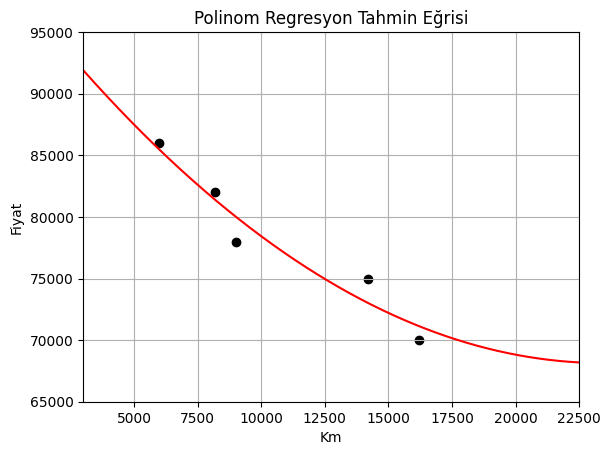

In [25]:
#Graph-1: Polinom Regresyon ve Eğitim Veri Seti

plt.figure()
plt.title('Polinom Regresyon Tahmin Eğrisi')
plt.xlabel('Km')
plt.ylabel('Fiyat')
plt.plot(xx,polinom_regresyon.predict(xx_polinom),c='r',linestyle='-')
plt.axis([3000,22500,65000,95000])
plt.grid(True)
plt.scatter(X_train, y_train, color='black')
plt.show()

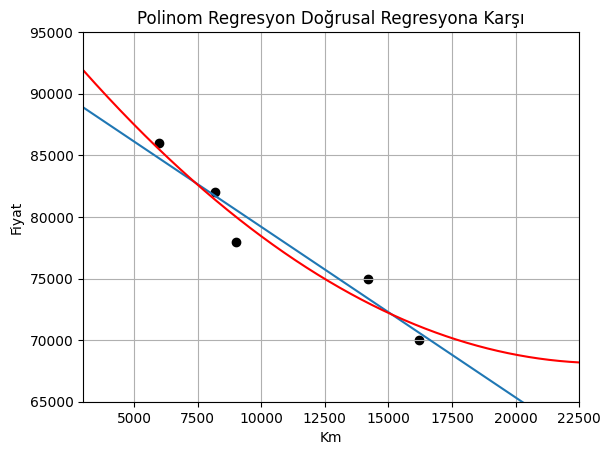

In [26]:
#Graph-2: Polinom Regresyon Eğitim Verisini Daha İyi Yakalıyor mu?

plt.figure()
plt.title('Polinom Regresyon Doğrusal Regresyona Karşı')
plt.xlabel('Km')
plt.ylabel('Fiyat')
plt.plot(xx,yy)
plt.plot(xx,polinom_regresyon.predict(xx_polinom),c='r',linestyle='-')
plt.axis([3000,22500,65000,95000])
plt.grid(True)
plt.scatter(X_train,y_train,color='black')
plt.show()

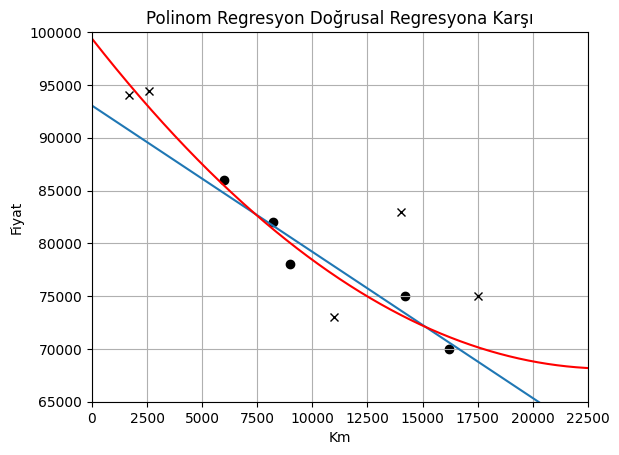

In [27]:
#Graph-3: Polinom Regresyon Veri Setlerini Daha İyi Yakalıyor mu?

plt.figure()
plt.title('Polinom Regresyon Doğrusal Regresyona Karşı')
plt.xlabel('Km')
plt.ylabel('Fiyat')
plt.plot(xx,yy)
plt.plot(xx,polinom_regresyon.predict(xx_polinom),c='r',linestyle='-')
plt.axis([0,22500,65000,100000])
plt.grid(True)
plt.scatter(X_train,y_train,color='black')
plt.plot(X_test,y_test,'x',color='black')
plt.show()

In [28]:
#Basit doğrusal regresyon modeli ve ikinci dereceden polinom regresyon modelini
#test veri setini tahmin etmedeki başarılarını kıyaslayalım:

print('Basit Doğrusal Reg R2: ',model.score(X_test,y_test))

print('Polinom Reg R2: ',polinom_regresyon.score(X_test_polinom,y_test))

Basit Doğrusal Reg R2:  0.5518147334399537
Polinom Reg R2:  0.6641120624315482


In [29]:
#Şimdi polinom derecelerini arttırarak (3,4,5) tahmin eğrisindeki değişimi
#gözlemyeleım ve tahmin edilen model parametrelerinin test veri seti üzerindeki
#başarısına bakalım:

polinom_derecesi= PolynomialFeatures(degree=3)
X_train_polinom=polinom_derecesi.fit_transform(X_train)
X_test_polinom=polinom_derecesi.transform(X_test)

polinom_regresyon = LinearRegression()
polinom_regresyon.fit(X_train_polinom,y_train)

xx_polinom=polinom_derecesi.transform(xx.reshape(xx.shape[0],1))
yy_polinom=polinom_regresyon.predict(xx_polinom)

print(xx_polinom)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.66667778e-01 2.77781482e-02 4.62972222e-03]
 [1.00000000e+00 3.33335556e-01 1.11112593e-01 3.70377778e-02]
 ...
 [1.00000000e+00 2.49996667e+04 6.24983333e+08 1.56243750e+13]
 [1.00000000e+00 2.49998333e+04 6.24991667e+08 1.56246875e+13]
 [1.00000000e+00 2.50000000e+04 6.25000000e+08 1.56250000e+13]]


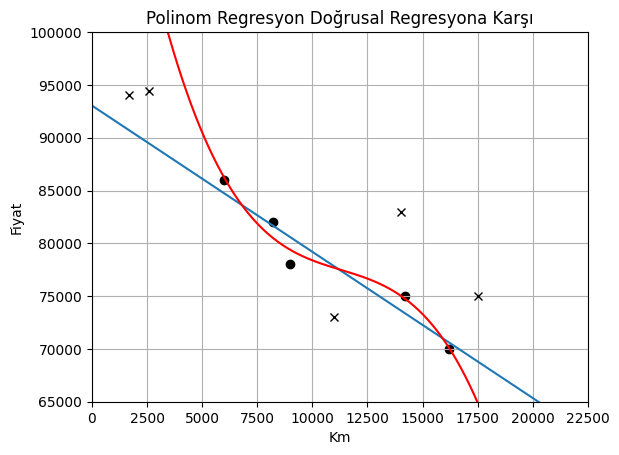

In [30]:
#Graph-4: 3.Derece Polinom Tahmin Eğrisi

plt.figure()
plt.title('Polinom Regresyon Doğrusal Regresyona Karşı')
plt.xlabel('Km')
plt.ylabel('Fiyat')
plt.plot(xx,yy)
plt.plot(xx,polinom_regresyon.predict(xx_polinom),c='r',linestyle='-')
plt.axis([0,22500,65000,100000])
plt.grid(True)
plt.scatter(X_train,y_train,color='black')
plt.plot(X_test,y_test,'x',color='black')
plt.show()

In [31]:
##### ÇOKLU DOĞRUSAL REGRESYON #####

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [33]:
#Veri setini İndiriyoruz ve ilk beşini görüntülüyoruz.

veri = pd.read_excel('https://www.dropbox.com/s/luoopt5biecb04g/SATILIK_EV1.xlsx?dl=1')
veri.head()

,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [34]:
#Veri setinin boyutuna bakalım.
veri.shape

(191, 6)

In [35]:
#Veri setinin tanımlayıcı istatistik özetine bakalım.
veri.describe()

,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
count,191.0000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,95.0000,649.476440,2.340314,85.183246,3.931937,12.753927
std,55.2811,111.064174,0.721401,16.482620,3.752974,8.374596
min,0.0000,450.000000,1.000000,40.000000,0.000000,0.000000
25%,47.5000,575.000000,2.000000,80.000000,0.000000,4.000000
50%,95.0000,650.000000,2.000000,90.000000,3.000000,16.000000
75%,142.5000,700.000000,3.000000,95.000000,7.000000,20.000000
max,190.0000,1175.000000,3.000000,125.000000,11.000000,24.000000


In [36]:
#Veri setinde eksik veri var mı diye kontrol edelim.
veri.isnull().any()

Unnamed: 0    False
Fiyat         False
Oda_Sayısı    False
Net_m2        False
Katı          False
Yaşı          False
dtype: bool

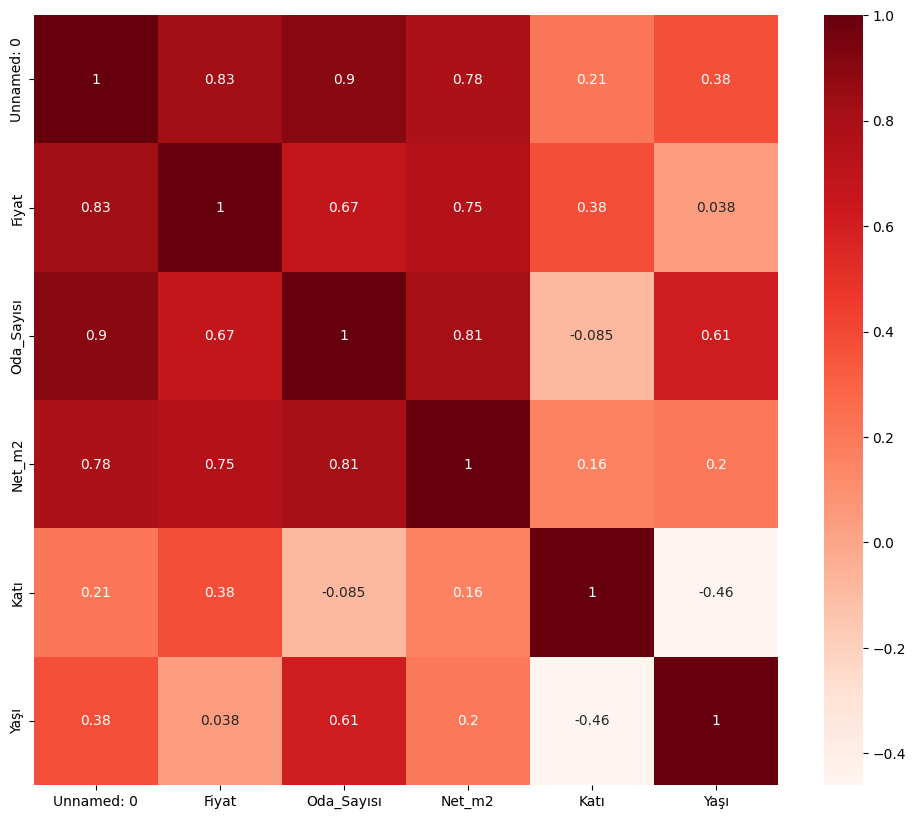

In [37]:
#Veri setindeki tüm değişkenlerin kendi aralarındaki korelasyonlarını görselleştirelim.
plt.figure(figsize=(12,10))
cor=veri.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

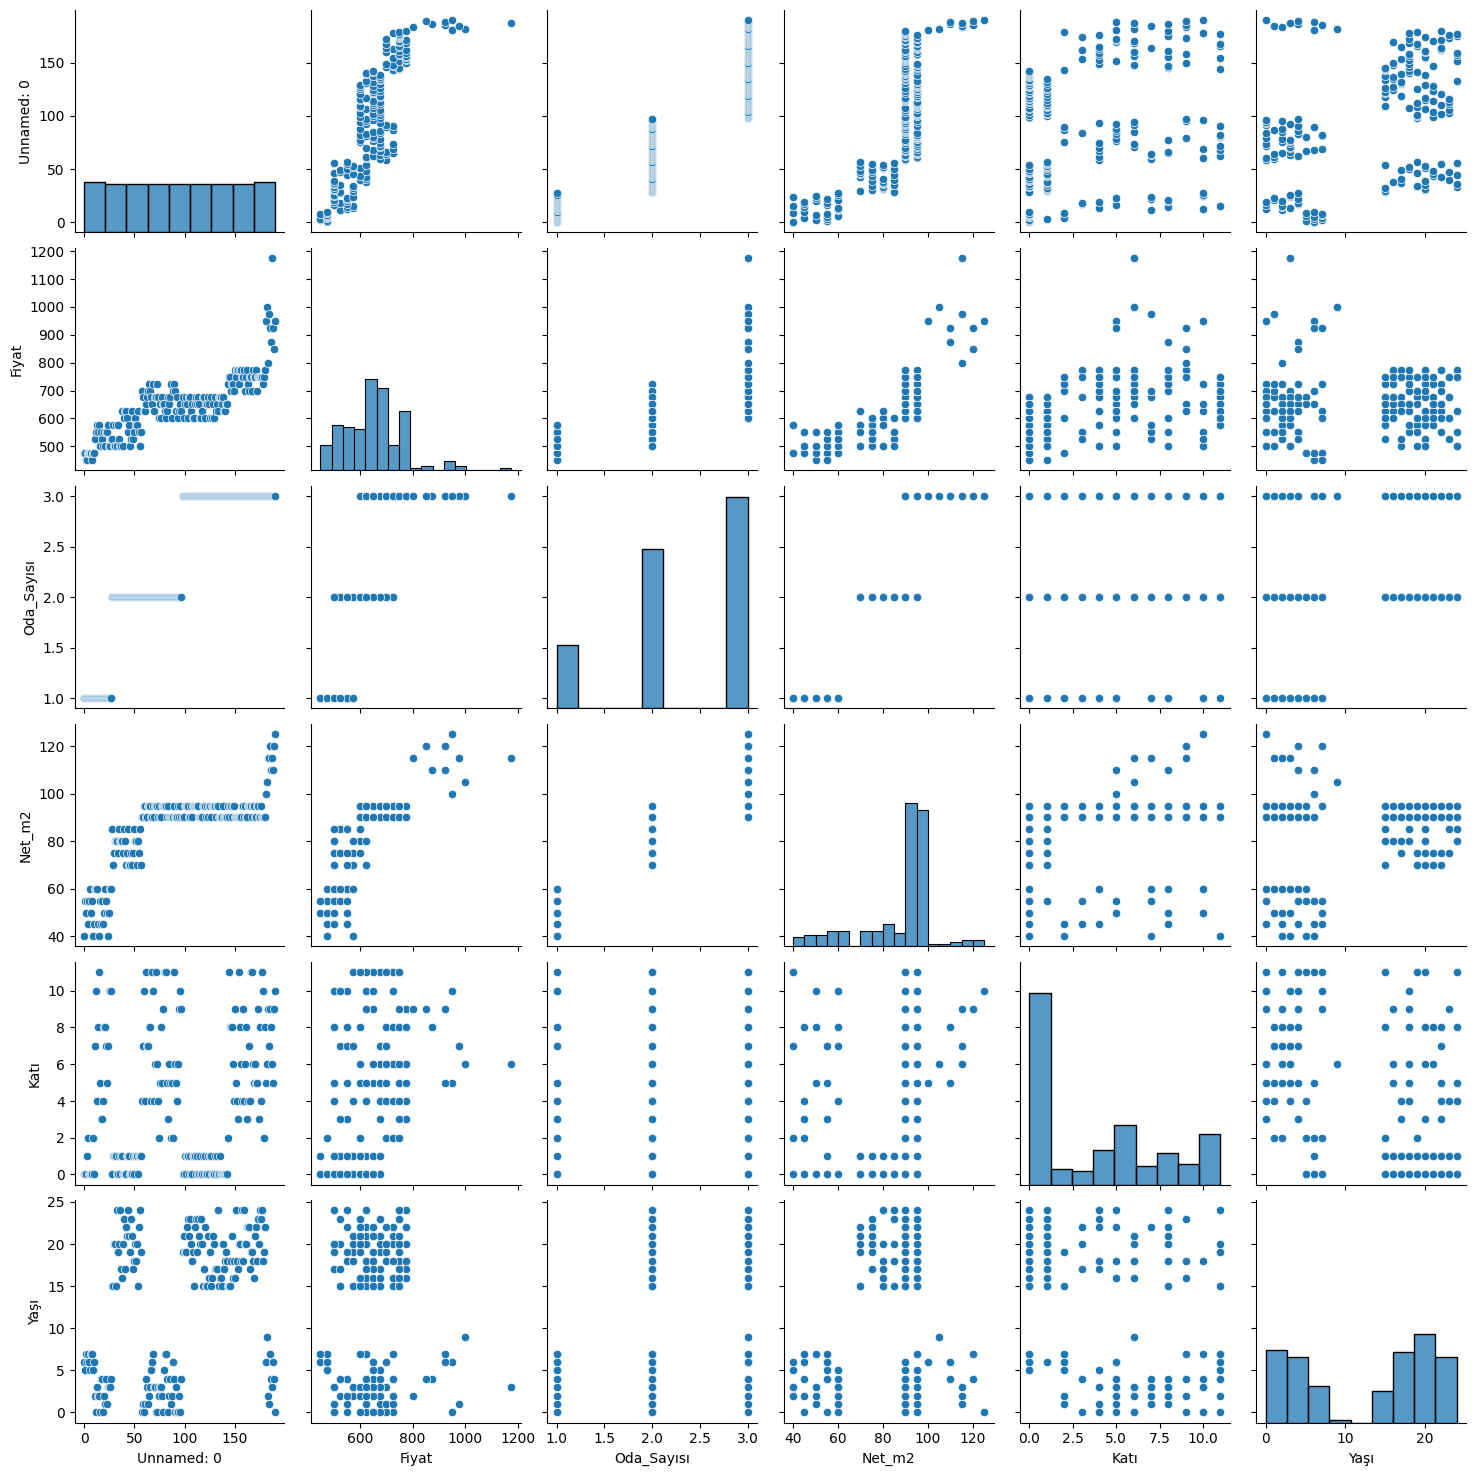

In [38]:
#Tüm değişkenlerin birbirleri ile olan serpilme diyagramlarına bakalım.
sns.pairplot(veri)

C:\Users\justi\AppData\Local\Temp\ipykernel_14460\842078978.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(veri['Fiyat'])


<Axes: xlabel='Fiyat', ylabel='Density'>

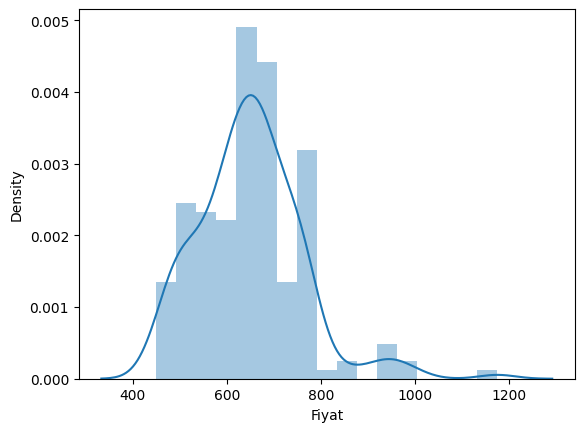

In [39]:
#hedef değişkenin olan fiyat değişkeninin dağılımına bakalım:
sns.distplot(veri['Fiyat'])

In [40]:
#Hedef (y) ve öznitelik değişkenlerini (X) tanımlayalım:
X= veri[['Oda_Sayısı','Net_m2','Katı','Yaşı']]
y= veri['Fiyat']

In [41]:
#Veri setini rassal olarak eğitim (Train) ve test veri seti olarak ikiye ayırıyoruz.
#Veri setinin % kaçının eğitim ve % kaçının test veri seti olduğunu belirlemek
#için 'test_size' parametresine değer giriyoruz.
#Burada test_size=0.2 yani verinin %80'i eğitim ve %20'si test seti.
#Ayrıca, 'random_state' parametresi için bir değer girdiğimizde algoritma her 
#çalıştırıldığında veri setini aynı şekilde rassal olarak böler.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
#Algroitmayı eğitip eğitim verisi üzerinden model oluşturmasını sağlayalım.
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [43]:
#Sabit (Intercept) ve öznitelik değişkenlerinin eğitim veri seti için 
#tahmin edilen parametrelerine bakalım:
model.intercept_

coeff_df= pd.DataFrame(model.coef_,X.columns,columns=['Öznitelik_Katsayıları'])
coeff_df

#Parametrelere göre tahmin modeli
#=> y = 305,35 + 118.35(OdaSayısı) + 1.133(NetM2) + 7.096(Katı) - 4.665(Yaşı)

,Öznitelik_Katsayıları
Oda_Sayısı,118.350670
Net_m2,1.133092
Katı,7.096886
Yaşı,-4.665706


In [44]:
#Eğitim veri seti için tahmin edilen değerleri ile karşılaştıralım.

y_pred_eğitim = model.predict(X_train)
for i, prediction in enumerate(y_pred_eğitim):
    print('Tahmin edilen ev fiyatı: ₺%.2f, Gerçek ev fiyatı: ₺ %s' % (prediction,y[i]))

Tahmin edilen ev fiyatı: ₺551.96, Gerçek ev fiyatı: ₺ 475
Tahmin edilen ev fiyatı: ₺686.31, Gerçek ev fiyatı: ₺ 475
Tahmin edilen ev fiyatı: ₺531.30, Gerçek ev fiyatı: ₺ 450
Tahmin edilen ev fiyatı: ₺694.64, Gerçek ev fiyatı: ₺ 450
Tahmin edilen ev fiyatı: ₺675.66, Gerçek ev fiyatı: ₺ 475
Tahmin edilen ev fiyatı: ₺698.38, Gerçek ev fiyatı: ₺ 475
Tahmin edilen ev fiyatı: ₺558.29, Gerçek ev fiyatı: ₺ 475
Tahmin edilen ev fiyatı: ₺678.21, Gerçek ev fiyatı: ₺ 475
Tahmin edilen ev fiyatı: ₺546.29, Gerçek ev fiyatı: ₺ 450
Tahmin edilen ev fiyatı: ₺680.84, Gerçek ev fiyatı: ₺ 475
Tahmin edilen ev fiyatı: ₺845.06, Gerçek ev fiyatı: ₺ 475
Tahmin edilen ev fiyatı: ₺546.29, Gerçek ev fiyatı: ₺ 525
Tahmin edilen ev fiyatı: ₺746.94, Gerçek ev fiyatı: ₺ 550
Tahmin edilen ev fiyatı: ₺562.47, Gerçek ev fiyatı: ₺ 575
Tahmin edilen ev fiyatı: ₺553.19, Gerçek ev fiyatı: ₺ 550
Tahmin edilen ev fiyatı: ₺693.21, Gerçek ev fiyatı: ₺ 575
Tahmin edilen ev fiyatı: ₺533.30, Gerçek ev fiyatı: ₺ 500
Tahmin edilen 

In [45]:
#Eğitim veri seti hedef değişkeni (Y_train) için r2'ye bakalım:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_eğitim)


0.733739961656849

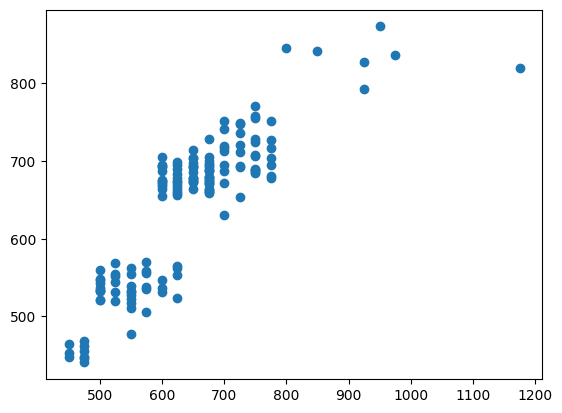

In [46]:
#Eğitim verisindeki hedef değişkeninin gerçek ve tahmin edilmiş değerlerinin
#serpilme grafiği:

plt.scatter(y_train,y_pred_eğitim)

In [47]:
#Şimdi de test veri seti için tahmin edilen gerçek değerler ile karşılaştıralım:
y_pred_test= model.predict(X_test)
for i,prediction in enumerate(y_pred_test):
    print('Tahmin edilen ev fiyatı:₺%.2f, Gerçek ev fiyatı: ₺ %s ' % (prediction,y[i]))

Tahmin edilen ev fiyatı:₺706.60, Gerçek ev fiyatı: ₺ 475 
Tahmin edilen ev fiyatı:₺654.37, Gerçek ev fiyatı: ₺ 475 
Tahmin edilen ev fiyatı:₺747.75, Gerçek ev fiyatı: ₺ 450 
Tahmin edilen ev fiyatı:₺692.29, Gerçek ev fiyatı: ₺ 450 
Tahmin edilen ev fiyatı:₺720.48, Gerçek ev fiyatı: ₺ 475 
Tahmin edilen ev fiyatı:₺537.57, Gerçek ev fiyatı: ₺ 475 
Tahmin edilen ev fiyatı:₺459.70, Gerçek ev fiyatı: ₺ 475 
Tahmin edilen ev fiyatı:₺521.32, Gerçek ev fiyatı: ₺ 475 
Tahmin edilen ev fiyatı:₺669.88, Gerçek ev fiyatı: ₺ 450 
Tahmin edilen ev fiyatı:₺686.31, Gerçek ev fiyatı: ₺ 475 
Tahmin edilen ev fiyatı:₺682.88, Gerçek ev fiyatı: ₺ 475 
Tahmin edilen ev fiyatı:₺720.79, Gerçek ev fiyatı: ₺ 525 
Tahmin edilen ev fiyatı:₺488.46, Gerçek ev fiyatı: ₺ 550 
Tahmin edilen ev fiyatı:₺725.65, Gerçek ev fiyatı: ₺ 575 
Tahmin edilen ev fiyatı:₺686.31, Gerçek ev fiyatı: ₺ 550 
Tahmin edilen ev fiyatı:₺781.01, Gerçek ev fiyatı: ₺ 575 
Tahmin edilen ev fiyatı:₺725.65, Gerçek ev fiyatı: ₺ 500 
Tahmin edilen 

In [48]:
#Test veri setindeki hedef değişkeni (y_test) için r2'ye bakalım:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_test)

0.6987282352837991

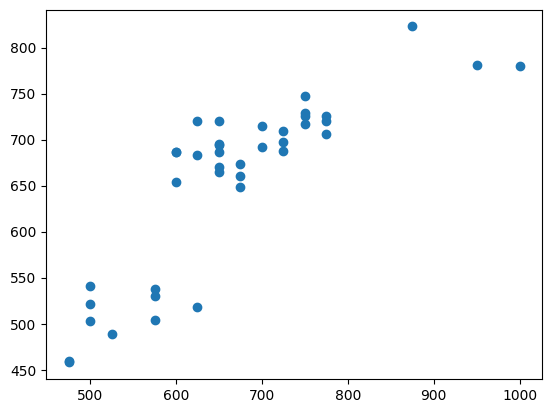

In [49]:
#Test verisindeki hedef değişkeninin gerçek ve tahmin edilmiş değerlerinin serpilme grafiği:
plt.scatter(y_test,y_pred_test)


In [50]:
#Şimdi de 3 odalı,8 yıllık bir binanın 4.katında bulunan 105m2 net kullanım alanına
#sahip olan bir dairenin fiyatını tahmin edelim:

Oda_Sayısı=3
Net_m2=105
Katı=4
Yaşı=8

print('Yeni evin fiyatı (₺): ' , model.predict([[Oda_Sayısı,Net_m2,Katı,Yaşı]]))

Yeni evin fiyatı (₺):  [770.25115988]


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##### LASSO Regresyanu #####

In [51]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size':12})
from sklearn.linear_model import Lasso

veri = pd.read_excel('https://www.dropbox.com/s/luoopt5biecb04g/SATILIK_EV1.xlsx?dl=1')
veri.head()


,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [52]:
#Hedef (y) ve öznitelik değişkenlerini (x) tanımlayalım.
X=veri[['Oda_Sayısı','Net_m2','Katı','Yaşı']]
y=veri['Fiyat']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
#Lasso algoritmasını eğitiyoruz.
lasso= Lasso()
lasso.fit(X_train,y_train)
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [54]:
#Scikit-Learn kütüphanesinde L1 Hiperparametresi aplha olarak isimlendirilmiştir.
#Sembolü (a) şeklindedir,eğer lasso uygulanırken değer belirtmediyseniz algoritma
#alpha değerini 1 olarak otomatik uygular.

print("Eğitim verisi için R2: ",train_score)
print("Test verisi için R2: ",test_score)
print("Kullanılan öznitelik sayısı (Ağırlığı sıfırdan büyük): ",coeff_used)

Eğitim verisi için R2:  0.7324650909211012
Test verisi için R2:  0.6862906745619389
Kullanılan öznitelik sayısı (Ağırlığı sıfırdan büyük):  4


In [55]:
#Lasso (Aplha=0.01):

lasso001= Lasso(alpha=0.01,max_iter=100000)
lasso001.fit(X_train,y_train)

train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001=np.sum(lasso001.coef_!=0)

print("Eğitim verisi için R2(alpha=0.01): ",train_score001)
print("Test verisi için R2(alpha=0.01): ",test_score001)
print("Kullanılan öznitelik sayısı (alpha=0.01): ",coeff_used001)


Eğitim verisi için R2(alpha=0.01):  0.7337398316689662
Test verisi için R2(alpha=0.01):  0.6986142688656936
Kullanılan öznitelik sayısı (alpha=0.01):  4


In [56]:
#Lasso (alpha=0.0001):

lasso00001= Lasso(alpha=0.0001,max_iter=100000)
lasso00001.fit(X_train,y_train)

train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001=np.sum(lasso00001.coef_!=0)

print("Eğitim verisi için R2(alpha=0.0001): ",train_score00001)
print("Test verisi için R2(alpha=0.0001): ",test_score00001)
print("Kullanılan öznitelik sayısı (alpha=0.0001): ",coeff_used00001)

Eğitim verisi için R2(alpha=0.0001):  0.7337399616438325
Test verisi için R2(alpha=0.0001):  0.6987270960928149
Kullanılan öznitelik sayısı (alpha=0.0001):  4


In [57]:
#Sonuçları çoklu doğrusal regresyon ile karşılaştırıyoruz.
#Doğrusal Regresyon modelini tekrar tahmin edelim.

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

print("Eğitim setinin R2'si: ",lr_train_score)
print("Test setinin R2'si: ",lr_test_score)

Eğitim setinin R2'si:  0.733739961656849
Test setinin R2'si:  0.6987282352837991


<function matplotlib.pyplot.show(close=None, block=None)>

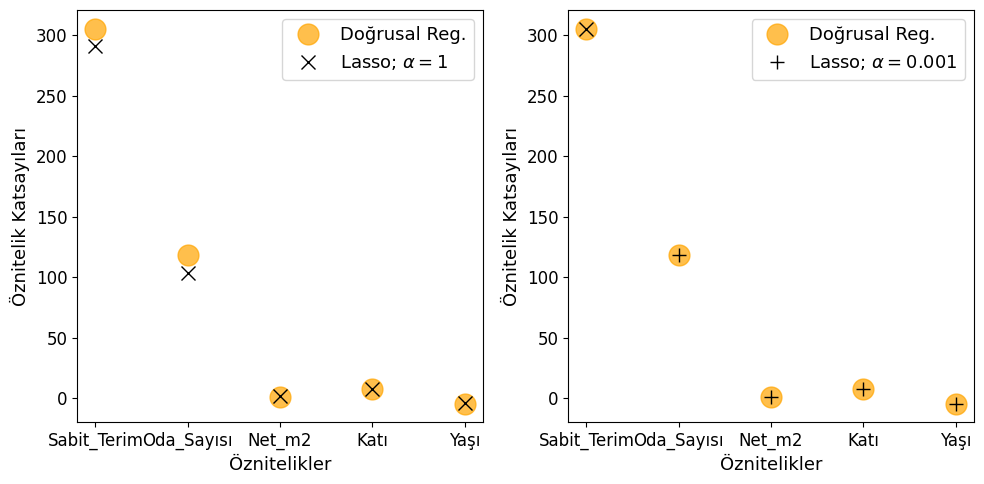

In [58]:
#Grafik: Lasso(Alpha 1 ve 0.001) ile Doğrusal Regresyon Karşılaştırması

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot((1,2,3,4),lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=15,
         color='orange',label='Doğrusal Reg.',zorder=2)
plt.plot((1,2,3,4),lasso.coef_,alpha=1,linestyle='none',marker='x',markersize=10,
         color='black',label=r'Lasso; $\alpha= 1$',zorder=7)
plt.plot(0,lr.intercept_,alpha=0.7,linestyle='none',marker='o',markersize=15,
         color='orange')
plt.plot(0,lasso.intercept_,alpha=1,linestyle='none',marker='x',markersize=10,
         color='black')
plt.xticks([0,1,2,3,4],('Sabit_Terim','Oda_Sayısı','Net_m2','Katı','Yaşı'),
           rotation='horizontal')
plt.xlabel('Öznitelikler',fontsize=13)
plt.ylabel('Öznitelik Katsayıları',fontsize=13)
plt.legend(fontsize=13,loc='upper right')
plt.subplot(1,2,2)
plt.plot((1,2,3,4),lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=15,
         color='orange',label='Doğrusal Reg.',zorder=2)
plt.plot((1,2,3,4),lasso001.coef_,alpha=1,linestyle='none',marker='+',markersize=10,
         color='black',label=r'Lasso; $\alpha = 0.001$')
plt.plot(0,lr.intercept_,alpha=0.7,linestyle='none',marker='o',markersize=15,
         color='orange')
plt.plot(0,lasso001.intercept_,alpha=1,linestyle='none',marker='x',markersize=10,
         color='black')
plt.xticks([0,1,2,3,4],('Sabit_Terim','Oda_Sayısı','Net_m2','Katı','Yaşı'),
            rotation='horizontal')
plt.xlabel('Öznitelikler',fontsize=13)
plt.ylabel('Öznitelik Katsayıları',fontsize=13)
plt.legend(fontsize=13,loc='upper right')
plt.tight_layout()
plt.show

In [59]:
#Alpha değeri 0'a yaklaştıkça lasso ile oluşturulan modelin tahmin parametreleri
#çoklu doğrusal regresyonun oluşturduğu tahmin parametrelerine yaklaşıyor.

#Lasso (alpha=1 ve 0.001) ile çoklu doğrusal reg. parametrelerine bakalım.
lasso.coef_

lasso00001.coef_

lr.coef_

array([118.35066956,   1.13309207,   7.09688622,  -4.66570638])

##### RIDGE REGRESYONU ##### 

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size':12})
from sklearn.linear_model import Ridge


In [61]:
#Veri setini indirelim ve ilk beşini görüntüleyelim.
veri = pd.read_excel('https://www.dropbox.com/s/luoopt5biecb04g/SATILIK_EV1.xlsx?dl=1')
veri.head()

,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [62]:
#Hedef (y) ve öznitelik değişkenlerini (x) tanımlayalım:    
X= veri[['Oda_Sayısı','Net_m2','Katı','Yaşı']]
y= veri['Fiyat']

In [63]:
#Veri Setini bölelim.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
#Çoklu doğrusal model (Ridge ile kıyaslamak için):
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [65]:
#Ridge ile eğitim verisini eğitelim.
#Ridge regresyonu için alpha parametresini giriyoruz.Alpha ne kadar yüksek olursa tahmin parametreleri
#üzerindeki kısıtlama o kadar fazla olur;
#Alpha ne kadar düşük olursa o kadar doğrusal regresyon parametre tahminlerine yaklaşmış olur.
#Farkı anlamak için 0.01 ve 100 gibi uç değerler verelim:

rr= Ridge(alpha=0.01)
rr.fit(X_train,y_train)

rr100 = Ridge(alpha=100)
rr100.fit(X_train,y_train)

Ridge(alpha=100)

In [66]:
#Doğrusal modelin eğitim ve test setleri için r2'lerini hesaplayalım:
train_score=lr.score(X_train,y_train)
test_score=lr.score(X_test,y_test)

In [67]:
#Alpha değeri 0.01 olan Ridge modelinin R2'lerini hesaplayalım:
ridge_train_score = rr.score(X_train,y_train)
ridge_test_score = rr.score(X_test,y_test)

In [68]:
#Alpha değeri 100 olan Ridge modelinin R2'lerini hesaplayalım:
ridge_train_score100 = rr100.score(X_train,y_train)
ridge_test_score100= rr100.score(X_test,y_test)

In [69]:
#R2 Sonuçlarına bakalım:
print("Eğitim seti için doğrusasal regresyon R2'si:",train_score)
print("Test seti için doğrusasal regresyon R2'si:",test_score)
print("Eğitim seti için Ridge regresyon(Alpha=0.01) R2'si:",ridge_train_score)
print("Test seti için Ridge regresyon(Alpha=0.01) R2'si:",ridge_test_score)
print("Eğitim seti için Ridge regresyon(Alpha=100) R2'si:",ridge_train_score100)
print("Test seti için Ridge regresyon(Alpha=100) R2'si:",ridge_test_score100)

Eğitim seti için doğrusasal regresyon R2'si: 0.733739961656849
Test seti için doğrusasal regresyon R2'si: 0.6987282352837991
Eğitim seti için Ridge regresyon(Alpha=0.01) R2'si: 0.7337398851682212
Test seti için Ridge regresyon(Alpha=0.01) R2'si: 0.6986433016403626
Eğitim seti için Ridge regresyon(Alpha=100) R2'si: 0.668225093447966
Test seti için Ridge regresyon(Alpha=100) R2'si: 0.5584311823011991


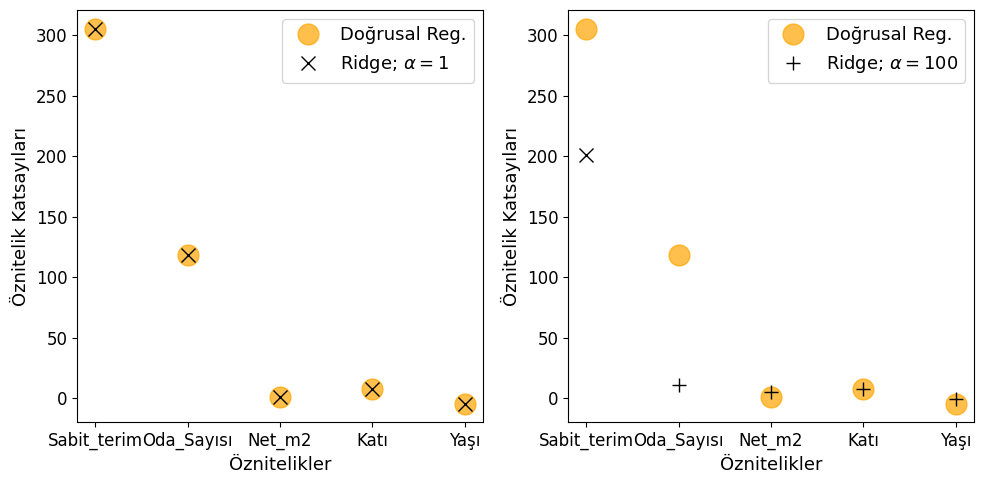

In [70]:
#Graph: Ridge (Alpha 0.01 ve 100) ile Doğrusal Reg. Karşılaştırması
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot((1,2,3,4),lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=15,
         color='orange',label='Doğrusal Reg.',zorder=2)
plt.plot((1,2,3,4),rr.coef_,alpha=1,linestyle='none',marker='x',markersize=10,
         color='black',label=r'Ridge; $\alpha = 1$',zorder=7)
plt.plot(0,lr.intercept_,alpha=0.7,linestyle='none',marker='o',markersize=15,
         color='orange')
plt.plot(0,rr.intercept_,alpha=1,linestyle='none',marker='x',markersize=10,
         color='black')
plt.xticks([0,1,2,3,4],('Sabit_terim','Oda_Sayısı','Net_m2','Katı','Yaşı'),
           rotation='horizontal')
plt.xlabel('Öznitelikler',fontsize=13)
plt.ylabel('Öznitelik Katsayıları',fontsize=13)
plt.legend(fontsize=13,loc='upper right')
plt.subplot(1,2,2)
plt.plot((1,2,3,4),lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=15,
         color='orange',label='Doğrusal Reg.',zorder=2)
plt.plot((1,2,3,4),rr100.coef_,alpha=1,linestyle='none',marker='+',markersize=10,
          color='black',label=r'Ridge; $\alpha = 100$')
plt.plot(0,lr.intercept_,alpha=0.7,linestyle='none',marker='o',markersize=15,
         color='orange')
plt.plot(0,rr100.intercept_,alpha=1,linestyle='none',marker='x',markersize=10,
         color='black')
plt.xticks([0,1,2,3,4],('Sabit_terim','Oda_Sayısı','Net_m2','Katı','Yaşı'),
           rotation='horizontal')
plt.xlabel('Öznitelikler',fontsize=13)
plt.ylabel('Öznitelik Katsayıları',fontsize=13)
plt.legend(fontsize=13,loc='upper right')
plt.tight_layout()
plt.show()

In [71]:
#Ridge (a=100) için parametre tahmin değerlerine bakalım:
rr100.intercept_

rr100_katsayılar=pd.DataFrame(rr100.coef_,X.columns,columns=
                              ['Ridge (a=100) Öznitelik_Katsayıları'])

rr100_katsayılar

,Ridge (a=100) Öznitelik_Katsayıları
Oda_Sayısı,11.104787
Net_m2,4.644286
Katı,7.093988
Yaşı,-0.376032


In [72]:
#Kıyaslamak için çoklu doğrusal reg. parametre tahminlerine bakalım:
lr.intercept_

lr_katsayılar=pd.DataFrame(lr.coef_,X.columns,columns=
                           ['Doğrusal Reg. Öznitelik_Katsayıları'])

lr_katsayılar

,Doğrusal Reg. Öznitelik_Katsayıları
Oda_Sayısı,118.350670
Net_m2,1.133092
Katı,7.096886
Yaşı,-4.665706


##### ELASTICNET #####

In [73]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size':12})
from sklearn.linear_model import ElasticNet

In [74]:
#Veri setini indiriyor ve ilk beşini görüntülüyoruz.
veri = pd.read_excel('https://www.dropbox.com/s/luoopt5biecb04g/SATILIK_EV1.xlsx?dl=1')
veri.head()

,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [75]:
#Veriyi bölelim:
X= veri[['Oda_Sayısı','Net_m2','Katı','Yaşı']]
y= veri['Fiyat']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
#ElasticNet algoritmasını eğitelim:
enet=ElasticNet()
enet.fit(X_train,y_train)
train_score=enet.score(X_train,y_train)
test_score=enet.score(X_test,y_test)
coeff_used=np.sum(enet.coef_!=0)

In [77]:
#Algoritmanın otomatik atanan parametrelerine bakalım:
enet

print("Eğitim verisi için R2:",train_score)
print("Test verisi için r2:",test_score)
print("Katsayısı sıfır olmayan öznitelik sayısı:",coeff_used)

Eğitim verisi için R2: 0.670871407649752
Test verisi için r2: 0.5627894869336405
Katsayısı sıfır olmayan öznitelik sayısı: 4


In [78]:
#ElasticNet (alpha=0.01):
enet001=ElasticNet(alpha=0.01,max_iter=10**6)
enet001.fit(X_train,y_train)

train_score001=enet001.score(X_train,y_train)
test_score001=enet.score(X_test,y_test)
coeff_used001=np.sum(enet001.coef_!=0)

print("Eğitim verisi için (alpha=0.01) r2:",train_score001)
print("Test verisi için (alpha=0.01) r2:",test_score001)
print("Katsayısı sıfır olmayan öznitelik sayısı(alpha=0.01):",coeff_used001)

Eğitim verisi için (alpha=0.01) r2: 0.7333501064823666
Test verisi için (alpha=0.01) r2: 0.5627894869336405
Katsayısı sıfır olmayan öznitelik sayısı(alpha=0.01): 4


In [79]:
#ElasticNet (alpha=100):
enet100=ElasticNet(alpha=100,max_iter=10**6)
enet100.fit(X_train,y_train)

train_score100=enet100.score(X_train,y_train)
test_score100=enet100.score(X_test,y_test)
coeff_used100=np.sum(enet100.coef_!=0)

print("Eğitim verisi için (alpha=100) r2:",train_score100)
print("Test verisi için (alpha=100) r2:",test_score100)
print("Katsayısı sıfır olmayan öznitelik sayısı(alpha=100):",coeff_used100)

Eğitim verisi için (alpha=100) r2: 0.5844501052872215
Test verisi için (alpha=100) r2: 0.4774896736928548
Katsayısı sıfır olmayan öznitelik sayısı(alpha=100): 3


In [80]:
#Doğrusal Regresyon modelini tekrar tahmin edelim:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

print("Eğitim setinin r2'si:",lr_train_score)
print("Test setinin r2'si:",lr_test_score)

Eğitim setinin r2'si: 0.733739961656849
Test setinin r2'si: 0.6987282352837991


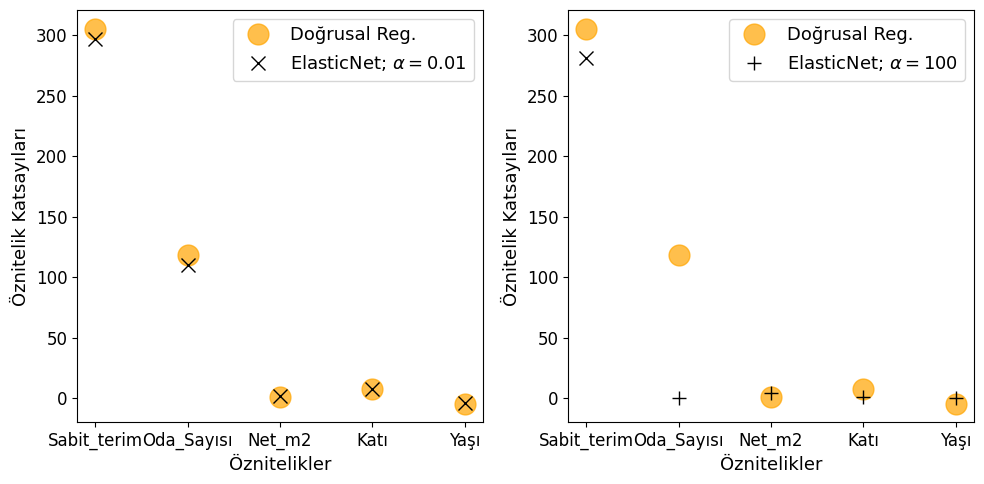

In [81]:
#Graph: ElasticNet (Alpha 1 ve 100) ile Doğrusal Reg. Karşılaştırması

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot((1,2,3,4),lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=15,
         color='orange',label='Doğrusal Reg.',zorder=2)
plt.plot((1,2,3,4),enet001.coef_,alpha=1,linestyle='none',marker='x',markersize=10,
         color='black',label=r'ElasticNet; $\alpha = 0.01$',zorder=7)
plt.plot(0,lr.intercept_,alpha=0.7,linestyle='none',marker='o',markersize=15,
         color='orange')
plt.plot(0,enet001.intercept_,alpha=1,linestyle='none',marker='x',markersize=10,
         color='black')
plt.xticks([0,1,2,3,4],('Sabit_terim','Oda_Sayısı','Net_m2','Katı','Yaşı'),
           rotation='horizontal')
plt.xlabel('Öznitelikler',fontsize=13)
plt.ylabel('Öznitelik Katsayıları',fontsize=13)
plt.legend(fontsize=13,loc='upper right')
plt.subplot(1,2,2)
plt.plot((1,2,3,4),lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=15,
         color='orange',label='Doğrusal Reg.',zorder=2)
plt.plot((1,2,3,4),enet100.coef_,alpha=1,linestyle='none',marker='+',markersize=10,
          color='black',label=r'ElasticNet; $\alpha = 100$')
plt.plot(0,lr.intercept_,alpha=0.7,linestyle='none',marker='o',markersize=15,
         color='orange')
plt.plot(0,enet100.intercept_,alpha=1,linestyle='none',marker='x',markersize=10,
         color='black')
plt.xticks([0,1,2,3,4],('Sabit_terim','Oda_Sayısı','Net_m2','Katı','Yaşı'),
           rotation='horizontal')
plt.xlabel('Öznitelikler',fontsize=13)
plt.ylabel('Öznitelik Katsayıları',fontsize=13)
plt.legend(fontsize=13,loc='upper right')
plt.tight_layout()
plt.show()

In [82]:
#ElasticNet (a=100) için parametre tahminlerine bakalım:
enet100.intercept_

enet100_katsayılar=pd.DataFrame(enet.coef_,X.columns,columns=
                                ['ElasticNet (a=100) Öznitelik_Katsayıları'])

enet100_katsayılar
#Alpha 100 için öznitelik katsayılardan biri 0'a çekilmişti,bu bina yaşıdır (-0,44)

,ElasticNet (a=100) Öznitelik_Katsayıları
Oda_Sayısı,13.260608
Net_m2,4.570416
Katı,7.151485
Yaşı,-0.442949


In [83]:
#Kıyaslamak için çoklu doğrusal reg. parametre tahminlerine bakalım:
lr.intercept_

lr_katsayılar=pd.DataFrame(lr.coef_,X.columns,columns=
                           ['Doğrusal Reg. Öznitelik_Katsayıları'])

lr_katsayılar

,Doğrusal Reg. Öznitelik_Katsayıları
Oda_Sayısı,118.350670
Net_m2,1.133092
Katı,7.096886
Yaşı,-4.665706


# GRIDSEARCH 

##### LASSO MODELİNİN İÇİN GRİDSEARCH ######

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [85]:
#Veri setini indiriyoruz.

veri = pd.read_excel('https://www.dropbox.com/s/luoopt5biecb04g/SATILIK_EV1.xlsx?dl=1')
veri.head()


,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [86]:
#Hedef (y) ve öznitelik değikenlerini (x) tanımlayalım:

X = veri[['Oda_Sayısı','Net_m2','Katı','Yaşı']]
y = veri['Fiyat']

In [87]:
#Eğitim ve Test seti bölünmesi:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=42)

In [88]:
#Algoritmayı seçelim ve bizim için önemli olan hiperparametreler için altrenatif
#değer serileri oluşturalım

lasso=Lasso(random_state=42)
parametreler={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,2,3,4,5,10,20,30,40,50]}

In [89]:
#GridSearch (Izgara Araması):
#En iyi sonucu verecek Lasso regresyonu için gridsearch uygulamasını yapıyoruz.
#GridSearch algoritmasının en iyi sonucu değerlendirmesi için scoring parametresini 
#R2 olarak giriyoruz.
#MSE,MAE gibi parametreler de kullanılabilir.CV(Cross-Validation) parametresi ise
#Gridsearch uygulamasında veri setini kaç defa rassal olarak böleceğini belirtmek içindir.
#CV=5 demek "Veri setini farklı farklı beş rassal eğitim ve test veri seti oluştur,
#bu beş eğitim veri setinde model tahmini yap ve bu tahminlerin R2'lerinin ortlamasını ver" demektir.

#GridSearch modeli için parametreleri tanımlayalım:

lasso_GS=GridSearchCV(lasso,parametreler,scoring='r2',cv=5)

In [90]:
#Algoritma Lasso ile girdiğimiz alternatif alpha değerlerinden yola çıkarak
#En iyi modeli üretecek Lasso hiperparametrelerini belirleyecek.
#Bunu yaparken de veri setinden beş defa(CV=5) rastgele eğitim verisi oluşturup
#Her biri için ayrı ayrı model oluşturacak ve oluşturduğu beş modelin test verileri üzerindeki performansını
#R2'lere bakarak değerlendirecek.

#GridSearchCV komutu ile en iyi modeli üretecek Lasso Hiperparametresini (alpha) hangisidir?
lasso_GS.fit(X_train,y_train)

C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.938e+05, tolerance: 1.557e+02
  model = cd_fast.enet_coordinate_descent(
C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.107e+05, tolerance: 1.481e+02
  model = cd_fast.enet_coordinate_descent(
C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.929e+05, tolerance: 1.425e+02
  model = cd_fast.enet_

GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   2, 3, 4, 5, 10, 20, 30, 40, 50]},
             scoring='r2')

In [91]:
#Lasso için en iyi modeli oluşturacak alpha ve L1_Ratio değeri nedir?
print(lasso_GS.best_params_)

{'alpha': 1}


In [92]:
#En iyi modeli üretecek TÜM Lasso Hiperparametreleri (alpha)
#GridSearch yapılmamış diğer parametrelerle birlikte.

print(lasso_GS.best_estimator_)

Lasso(alpha=1, random_state=42)


In [93]:
#Eğitim seti için en iyi modeli üretecek Lasso hiperparametreleri:
Lasso(alpha=1,copy_X=True,fit_intercept=True,max_iter=1000,positive=False,precompute=False,random_state=42,
      selection='cyclic',tol=0.0001,warm_start=False)

Lasso(alpha=1, random_state=42)

In [94]:
#5 Alternatif eğitim setinin R2'lerinin ortalaması nedir?
print(lasso_GS.best_score_) 
#(Bu en iyi modelin R2'si değil,rassal olarak seçilen,
#beş eğitim seti için oluşturulan modelin R2'sidir.)

0.7070875030803954


In [95]:
#Çapraz Doğrulama (Cross-Validation CV)
all_accuracies = cross_val_score(estimator=lasso_GS.best_estimator_,
                                 X=X_train,y=y_train,cv=5)

In [96]:
#Cross-Validation Skorları:
print(all_accuracies)
print(all_accuracies.mean())
print(all_accuracies.std())

[0.59123045 0.86153674 0.75880023 0.58955277 0.73431731]
0.7070875030803954
0.1044102534033502


In [97]:
#Tahmin modelinin katsayılarına bakalım:
#Lasso'nun ürettiği en iyi modelin tahmin parametreleri:
lasso_GS.best_estimator_.intercept_

Öznitelik_katsayıları = pd.DataFrame(
    lasso_GS.best_estimator_.coef_,X.columns,
    columns=['Lasso (a=1) Öznitelik Katsayıları'])

Öznitelik_katsayıları

,Lasso (a=1) Öznitelik Katsayıları
Oda_Sayısı,103.407284
Net_m2,1.619248
Katı,7.086422
Yaşı,-4.055176


In [98]:
#Şimdi de en iyi Lasso modelinin eğitim ve test veri seti üzerindeki performansına bakalım:

lasso_train_score = lasso_GS.best_estimator_.score(X_train,y_train)
lasso_test_score = lasso_GS.best_estimator_.score(X_test,y_test)
print("Eğitim seti için R2:",lasso_train_score)
print("Test seti için R2:",lasso_test_score)

Eğitim seti için R2: 0.7324650909211012
Test seti için R2: 0.6862906745619389


In [99]:
#Tahmin modeli ile tüm veri seti için ev fiyatlarını tahmin edelim:
veri['Fiyat_Tahmini']=lasso_GS.best_estimator_.predict(X)


    Fiyat  Fiyat_Tahmini
0     475     434.584450
1     475     462.928338
2     450     446.721749
3     450     465.959585
4     475     452.798357
5     475     458.873162
6     475     471.024575
7     475     446.721749
8     450     454.817987
9     475     452.812470
10    475     442.680687
11    525     532.795059
12    550     562.164677
13    575     507.480616
14    550     515.592769
15    575     528.755799
16    500     518.636328
17    550     472.050306
18    525     488.242781
19    500     495.357430


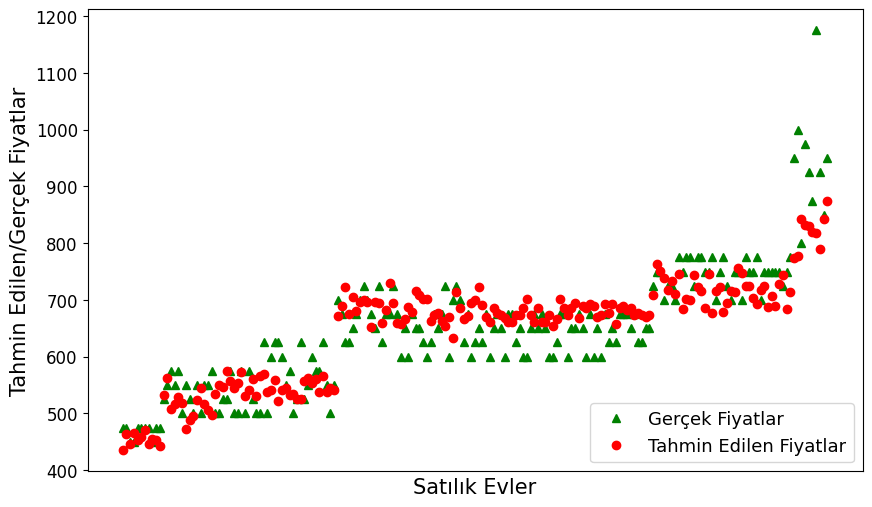

In [100]:
#Tahmin edilen ve Gerçek ev fiyatlarını ilk 20'sine bakalım:
print(veri[['Fiyat','Fiyat_Tahmini', ]].head(20))

#Grafik: Evlerin Gerçek ve Tahmin edilmiş fiyatların karşılaştırması:
plt.figure(figsize=(10,6))
plt.xticks(veri['Fiyat'],veri.index.values) #Location,labels
plt.plot(veri['Fiyat'],'g^')
plt.xticks(veri['Fiyat_Tahmini'],veri.index.values) #Locations,labels
plt.plot(veri['Fiyat_Tahmini'],'ro')
plt.xlabel('Satılık Evler', fontsize=15)
plt.ylabel('Tahmin Edilen/Gerçek Fiyatlar', fontsize=15)
plt.legend(['Gerçek Fiyatlar','Tahmin Edilen Fiyatlar'],fontsize=13, loc='lower right')
plt.show()

In [101]:
#Lasso (alpha=1) için oluşturulan model ile 3 odalı,
#105 M2,4:Katta bulunan 8 yıllık dairenin fiyatını tahmin edelim:
Oda_Sayısı = 3
Net_m2 = 105
Katı = 4
Yaşı = 8

print('Yeni Evin Fiyatı (₺):', lasso_GS.best_estimator_.predict([[Oda_Sayısı,
                                                                 Net_m2,Katı,Yaşı]]))

#108

Yeni Evin Fiyatı (₺): [766.88544391]


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
